# 데이터 분석 - 전세계 행복 지수

## 1. 문제 정의하기

- 정보 탐색하기

1. 우리나라의 행복 지수는 몇 위인지 그리고 나라별 행복 지수 순위는 어떻게 되는지 파악하기
2. 전 세계 나라별 행복 지수를 한눈에 보기 쉽게 표현하는 방법 찾아보기
3. 행복 지수 속성과 관련 깊은 속성이 무엇인지 알아보기

## 2. 데이터셋 불러오기

### 데이터셋 소개

- 유엔 산하 자문기구인 지속가능바렂ㄴ 해법 네트워크(SDSN)에서는 매년 세계 행복 보고서를 발표하고 있음.
- 1인당 국내총생산, 사회적 지원, 건강 수명, 삶에 대한 선택의 자유, 관용, 부정부패 인식 지수를 기준으로 행복 지수를 발표.
- 본 데이터는 세계 행복 보고서를 기반으로 하여 국가명, 지역, 나라별 행복 지수, 1인당 국내총생산 등 다양한 속성 존재.

In [3]:
import pandas as pd
# 데이터 시각화하기 위한 라이브러리들
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# 파일 업로드하기
from google.colab import files
uploaded = files.upload()

### 판다스로 파일 읽어 들이기

In [5]:
data_path = 'world-happiness-report-2021.csv'
happiness_data = pd.read_csv(data_path)
happiness_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


### 데이터 살펴보기
- 데이터 전처리
    - 문제해결을 위해 데이터에 어떤 속성이 있는지 살펴보고 필요한 속성을 추출하거나 정렬할 필요가 있음
    - 경우에 따라서 속성값에 대한 연산을 수행하여 필요한 속성을 만들어내야할 때가 있음

In [6]:
# 데이터 개수, 속성 개수, 속성명, 결측치, 속성의 데이터 유형 등 확인
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

### 주요 속성 추출하기
- 데이터 분석에 필요한 주요 속성만 선택하여 추출

- 주요 속성

| 인덱스 (Index) | 주요 속성명 (Attribute Name) | 설명 (Description) |
| :---: | :--- | :--- |
| 0 | Country name | 국가명 |
| 1 | Regional indicator | 지역 |
| 2 | Ladder score | 행복 지수 |
| 6 | Logged GDP per capita | 1인당 국내총생산 |
| 7 | Social support | 사회적 지원 |
| 8 | Healthy life expectancy | 건강 수명 |
| 9 | Freedom to make life choices | 삶에 대한 선택의 자유 |
| 10 | Generosity | 관용 |
| 11 | Perceptions of corruption | 부정부패 인식 지수 |

<br>

- 부가 속성 : 부가 속성 11개는 주요 속성에 대한 통계값으로, 부가적인 속성에 속하므로 데이터 전처리 과정에서 제외

| 인덱스 (Index) | 주요 속성명 (Attribute Name) |
| :---: | :--- |
| 3 | Standard error of ladder score |
| 4 | upperwhisker |
| 5 | lowerwhisker |
| 12 | Ladder score in Dystopia |
| 13 | Explained by: Log GDP per capita |
| 14 | Explained by: Social support |
| 15 | Explained by: Healthy life expectancy |
| 16 | Explained by: Freedom to make life choices |
| 17 | Explained by: Generosity |
| 18 | Explained by: Perceptions of corruption |
| 19 | Dystopia + residual |

<br>


In [7]:
# 주요 속성 인덱스만 추출
happiness = happiness_data.iloc[:, [0,1,2,6,7,8,9,10,11]]
happiness.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [8]:
# 주요 속성의 통계량 파악
happiness.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


## 3. 데이터 탐색 및 시각화

### 탐색 정보1 알아보기
- 우리나라의 행복 지수 순위 및 나라별 행복 지수 순위 알아보기

In [9]:
# 행복 지수 속성을 기준으로 내림차순 정렬 후 한국의 행복 지수 알아보기
happiness = happiness.sort_values(by = 'Ladder score', ascending= False)
happiness.loc[happiness['Country name'] == 'South Korea']

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
61,South Korea,East Asia,5.845,10.651,0.799,73.9,0.672,-0.083,0.727


- 해석 : 우리나라의 행복 지수는 5.845이고, 행복 지수 순위는 149개국 중 62위인 것을 확인할 수 있다.

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_87043/4191555939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Ladder score', y = 'Country name',


<Axes: xlabel='Ladder score', ylabel='Country name'>

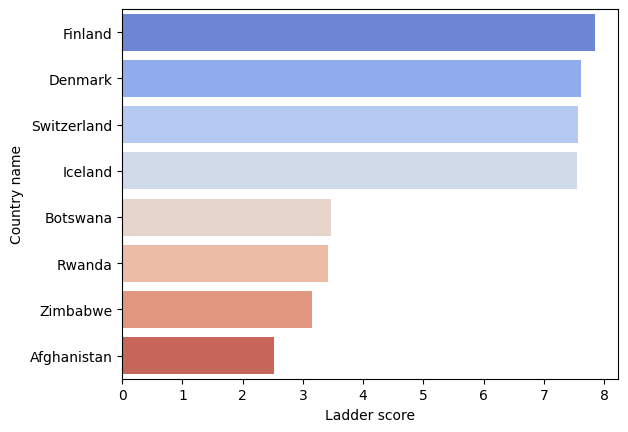

In [ ]:
# 행복 지수 속성값이 7.5 이상인 나라와 3.5 이하인 나라를 가로형 막대그래프로 출력해보기
happinessFilter = (happiness.loc[:, 'Ladder score'] >= 7.5) | \
                  (happiness.loc[:, 'Ladder score'] <= 3.5)
# barplot()의 괄호 안에 x,y축 이름 및 그래프 색상 정보 설정
sns.barplot(x = 'Ladder score', y = 'Country name',
            data = happiness[happinessFilter], palette= 'coolwarm')